In [60]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,File,Subjects,Keywords,Cited-by-count
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0
3,202202862.json,PHYS,NaN,0.0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0
...,...,...,...,...
20211,201802218.json,COMP,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,0.0
20212,201800225.json,MULT,NaN,27.0
20213,201802648.json,MEDI,Rehabilitation;Transcranial direct current sti...,7.0
20214,201800675.json,VETE,Canine cognitive dysfunction syndrome;Thailand...,1.0


In [61]:
df2 = df.dropna()
df2['Subjects']

0        AGRI;VETE;BIOC
1                  MEDI
2                  NEUR
4                  MEDI
5                  AGRI
              ...      
20208         PSYC;SOCI
20210              MEDI
20211              COMP
20213              MEDI
20214              VETE
Name: Subjects, Length: 16408, dtype: object

In [62]:


# Example data (replace with your actual DataFrame)
data = {
    "Subjects": df2['Subjects']}
df3 = pd.DataFrame(data)

# Step 1: Split the Subjects column into individual categories
df3['Subjects_split'] = df3['Subjects'].str.split(';')

# Step 2: Explode the lists into separate rows
exploded_df = df3.explode('Subjects_split')

# Step 3: Create dummy variables for the exploded column
dummy_df = pd.get_dummies(exploded_df['Subjects_split'])

# Step 4: Aggregate the dummy variables back to the original DataFrame
# Group by the original DataFrame's index
dummy_df = dummy_df.groupby(exploded_df.index).sum()

# Step 5: Combine the dummy-coded columns with the original DataFrame
df3 = pd.concat([df3, dummy_df], axis=1)

# Drop the intermediate column if you no longer need it
df3 = df3.drop(columns=['Subjects_split'])

df3

,Subjects,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,AGRI;VETE;BIOC,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,NEUR,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,AGRI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,PSYC;SOCI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
20210,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20211,COMP,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20213,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [63]:
df4 = pd.concat([df2,df3.drop(columns=['Subjects'])], axis=1)

In [64]:
df4.head()

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df5= pd.DataFrame(df4['Keywords'])

df5

,Keywords
0,Microencapsulation;Basil Oil;Performance;Broil...
1,care delivery;neurocritical care;resources;COV...
2,Partial Least Squares (PLS) analysis;neurocogn...
4,Cardiorespiratory function;Bra;Metabolism
5,tropical rainforest;Ichneumonoidea;insect-frui...
...,...
20208,National prevalence;Intimate partner violence;...
20210,therapeutic hypothermia;neurological prognosti...
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...
20213,Rehabilitation;Transcranial direct current sti...


In [66]:
from gensim.models import Word2Vec
import numpy as np


In [67]:

# Step 1: Split sentences into words using semicolon
df5['Tokenized'] = df5["Keywords"].apply(lambda x: x.split(';'))

df5



,Keywords,Tokenized
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]"
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f..."
...,...,...
20208,National prevalence;Intimate partner violence;...,"[National prevalence, Intimate partner violenc..."
20210,therapeutic hypothermia;neurological prognosti...,"[therapeutic hypothermia, neurological prognos..."
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,"[Landsat 8, NDVI, Sentinel-2, Remote sensing, ..."
20213,Rehabilitation;Transcranial direct current sti...,"[Rehabilitation, Transcranial direct current s..."


In [68]:

# Step 2: Train Word2Vec model
# Create a Word2Vec model using the tokenized column
w2v_model = Word2Vec(sentences=df5['Tokenized'], vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Convert words to vectors
def row_to_vector(row, model):
    vectors = []
    for word in row:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        # Average the vectors for the row
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words were in the vocabulary
        return np.zeros(model.vector_size)

df5['Vector'] = df5['Tokenized'].apply(lambda x: row_to_vector(x, w2v_model))

# Step 4: Save or use the vectors
print(df5[['Keywords', 'Vector']])


                                                Keywords  \
0      Microencapsulation;Basil Oil;Performance;Broil...   
1      care delivery;neurocritical care;resources;COV...   
2      Partial Least Squares (PLS) analysis;neurocogn...   
4              Cardiorespiratory function;Bra;Metabolism   
5      tropical rainforest;Ichneumonoidea;insect-frui...   
...                                                  ...   
20208  National prevalence;Intimate partner violence;...   
20210  therapeutic hypothermia;neurological prognosti...   
20211  Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...   
20213  Rehabilitation;Transcranial direct current sti...   
20214  Canine cognitive dysfunction syndrome;Thailand...   

                                                  Vector  
0      [-0.0045250584, 0.0037720462, 0.0018609132, -0...  
1      [-0.0028804198, 0.0012926756, 0.0003501963, 0....  
2      [-0.0032583592, -0.0005940987, 0.006007883, -0...  
4      [0.0030513501, -0.0017249834, -0.001

In [69]:

df5.head()

,Keywords,Tokenized,Vector
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B...","[-0.0045250584, 0.0037720462, 0.0018609132, -0..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,...","[-0.0028804198, 0.0012926756, 0.0003501963, 0...."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco...","[-0.0032583592, -0.0005940987, 0.006007883, -0..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]","[0.0030513501, -0.0017249834, -0.0012090113, 0..."
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f...","[-0.0009293018, 0.00077024, -0.006195457, -0.0..."


In [70]:
df5["Vector"].iloc[0].mean()

0.00018897977

In [71]:
df5['Mean'] = df5['Vector'].apply(lambda x: x.mean())
df5['Vector'].head()

0    [-0.0045250584, 0.0037720462, 0.0018609132, -0...
1    [-0.0028804198, 0.0012926756, 0.0003501963, 0....
2    [-0.0032583592, -0.0005940987, 0.006007883, -0...
4    [0.0030513501, -0.0017249834, -0.0012090113, 0...
5    [-0.0009293018, 0.00077024, -0.006195457, -0.0...
Name: Vector, dtype: object

In [72]:
df6 = pd.concat([df4,df5['Mean']], axis=1)

In [73]:

df6.head()


,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000189
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000295
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.000243
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.000276
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000149


In [74]:
df6.loc[df6['Subjects']=="COMP"].sort_values(by="Mean")

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
18425,201800631.json,COMP,Deep Learning;Text Categorization;Hierarchical...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000857
3869,202201056.json,COMP,Crowd Evacuation;Reinforcement Learning;Evacua...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000851
8590,201900067.json,COMP,Stochastic Petri Nets;Formal Model;Multi-Serve...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000782
8832,201900072.json,COMP,Formal model;Priority Queue;Generalized Stocha...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000772
14097,202003113.json,COMP,Deep Learning;Semantic Segmentation;Multi-task...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.000640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,202100990.json,COMP,Palpebral fissure region;Emotion;Decision tree...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000706
6890,202301949.json,COMP,data quality control;crowdsourcing;data labeling,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000788
11951,202103128.json,COMP,Formal verification;Timed automata;Simulation;...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000898
12647,202100788.json,COMP,Imbalanced problem;Undersampling;Mass ratio va...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000947


In [75]:
df6 = df5.drop(columns="Mean", inplace=True)

In [76]:
df4.head(1)

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df6 = df5.drop(columns=['Tokenized', 'Keywords'])

In [78]:
df6

,Vector
0,"[-0.0045250584, 0.0037720462, 0.0018609132, -0..."
1,"[-0.0028804198, 0.0012926756, 0.0003501963, 0...."
2,"[-0.0032583592, -0.0005940987, 0.006007883, -0..."
4,"[0.0030513501, -0.0017249834, -0.0012090113, 0..."
5,"[-0.0009293018, 0.00077024, -0.006195457, -0.0..."
...,...
20208,"[-0.00075579644, 0.001509272, -0.00016032113, ..."
20210,"[0.005503269, -0.0019770304, 0.0054998514, 0.0..."
20211,"[0.0011238543, -0.0026148255, -0.0004780964, 0..."
20213,"[-0.004634535, 0.005042147, -0.0029710955, -0...."


In [84]:
df7 = pd.concat([df4,df6], axis=1)
X = df7.drop(columns=['File','Subjects','Keywords','Cited-by-count'])
X.head()

,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Vector
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[-0.0045250584, 0.0037720462, 0.0018609132, -0..."
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[-0.0028804198, 0.0012926756, 0.0003501963, 0...."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[-0.0032583592, -0.0005940987, 0.006007883, -0..."
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[0.0030513501, -0.0017249834, -0.0012090113, 0..."
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.0009293018, 0.00077024, -0.006195457, -0.0..."


In [91]:
vector_expanded = pd.DataFrame(X['Vector'].tolist(), index=X.index)
vector_expanded.columns = [f'Vector_{i}' for i in range(vector_expanded.shape[1])]
df_expanded = pd.concat([X.drop(columns=['Vector']), vector_expanded], axis=1)
df_expanded.loc[df_expanded["COMP"] == 1]


,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,Vector_90,Vector_91,Vector_92,Vector_93,Vector_94,Vector_95,Vector_96,Vector_97,Vector_98,Vector_99
9,0,0,0,0,0,0,1,0,0,0,...,-0.000799,0.002428,0.000886,-0.000565,-0.001414,-0.002665,-0.000090,-0.000792,0.001458,0.000139
14,0,0,0,0,0,0,1,0,0,0,...,-0.000268,-0.003944,0.003089,0.004291,0.000144,0.001161,0.002299,-0.000366,0.002207,-0.003128
39,0,0,0,0,0,0,1,0,0,0,...,0.000609,0.001140,-0.001324,0.001951,0.002056,0.002249,0.001674,-0.001916,-0.002240,-0.003178
42,0,0,0,0,0,0,1,0,0,0,...,0.006028,-0.004828,0.001017,0.001257,-0.001199,0.001875,0.000236,0.002967,0.001837,-0.002767
49,0,0,1,0,0,1,1,0,0,0,...,0.001310,-0.002605,0.003972,0.001148,0.000903,-0.003303,-0.003159,0.003826,-0.002839,0.001311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,0,0,0,0,0,0,1,0,0,0,...,-0.000748,-0.002480,0.000472,-0.000693,-0.002288,0.000181,-0.004349,-0.002508,0.003489,-0.000145
20183,0,0,0,1,0,0,1,1,0,0,...,-0.004020,-0.000357,0.000730,-0.000249,-0.002337,0.004490,0.002433,-0.000986,-0.002080,-0.000598
20191,0,0,0,0,0,0,1,0,0,0,...,0.002859,-0.002269,-0.002831,0.003826,0.000920,0.005212,-0.002386,0.000674,0.004462,0.003413
20194,0,0,0,0,0,0,1,0,0,0,...,-0.005171,-0.000312,0.005571,-0.000861,-0.003670,0.000133,0.003002,0.000174,0.002382,-0.002455


In [92]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, algorithm='brute')
neigh.fit(df_expanded.loc[df_expanded["COMP"] == 1])

NearestNeighbors(algorithm='brute')

Distances to neighbors: [[0.         9.33106392 9.37081722 9.396389   9.53303224]]
Indices of neighbors: [[   0 1067  467 1527  191]]


/var/folders/mz/nj2bd8155z18bs0qd4rr9dsh0000gn/T/ipykernel_53789/3820832355.py:18: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
/var/folders/mz/nj2bd8155z18bs0qd4rr9dsh0000gn/T/ipykernel_53789/3820832355.py:20: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)


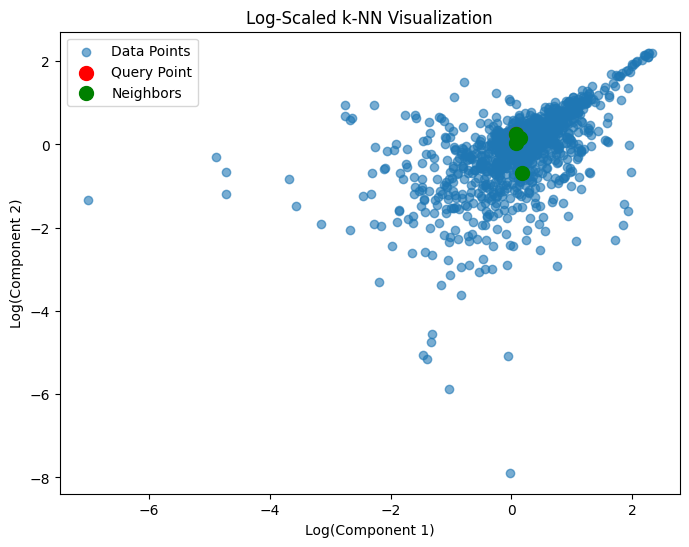

In [95]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded["COMP"] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)
plt.title('Log-Scaled k-NN Visualization')
plt.xlabel('Log(Component 1)')
plt.ylabel('Log(Component 2)')
plt.legend()
plt.show()

Distances to neighbors: [[0.         9.33106392 9.37081722 9.396389   9.53303224]]
Indices of neighbors: [[   0 1067  467 1527  191]]


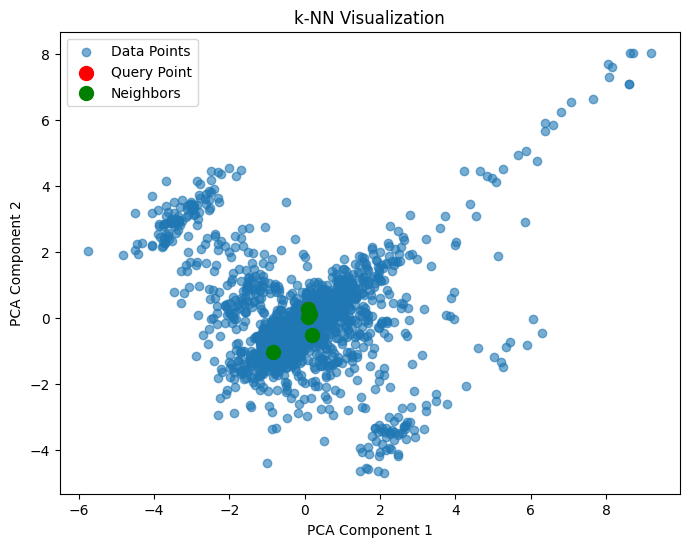

In [96]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded["COMP"] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], label="Data Points", alpha=0.6)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label='Neighbors', s=100)
plt.title('k-NN Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()